# First model

## Imports

In [1]:
import random
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.backend import clear_session
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Model

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2021-08-27 21:35:40.266750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-27 21:35:40.270879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-27 21:35:40.271169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
TRAIN_DATASET_PATH = '../dataset/images/train/'
TEST_DATASET_PATH = '../dataset/images/test/'

In [4]:
TARGET_DECODED = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '+',
    11: '-',
    12: '*',
    13: '/',
}

## Load dataset

In [5]:
def load_data(dataset_type: str):
    if dataset_type.lower() == 'train':
        dataset_path = TRAIN_DATASET_PATH
    elif dataset_type.lower() == 'test':
        dataset_path = TEST_DATASET_PATH
    else:
        raise RuntimeError('Invalid dataset_type')
        
    x, y = [], []
    for file_name in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file_name)
        
        target = int(os.path.splitext(file_name)[0].split('-')[1])
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        
        x.append(image)
        y.append(target)
    return np.array(x), np.array(y)

In [6]:
x_train, y_train = load_data('train')

In [7]:
x_test, y_test = load_data('test')

In [8]:
x_train = x_train[:, np.newaxis, :] / 255.
x_test = x_test[:, np.newaxis, :] / 255.

## Model

In [9]:
def build_model() -> Model:
    input_ = Input(shape=(1, 28, 28))
    
    conv1 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(input_)
    maxp2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)
    drop1 = Dropout(0.25)(maxp2)

    flat1 = Flatten()(drop1)
    
    dens1 = Dense(128, activation='relu')(flat1)
    drop2 = Dropout(0.5)(dens1)
    outp1 = Dense(len(TARGET_DECODED), activation='softmax')(drop2)
    
    
    model = Model(input_, outp1)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    
    return model

In [10]:
clear_session()
model = build_model()

2021-08-27 21:35:53.803219: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-27 21:35:53.803605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-27 21:35:53.803950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-27 21:35:53.804234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 28, 28)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 28, 64)         16192     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 14, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 14, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               114816    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

## Fit

In [12]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.1
)

2021-08-27 21:36:00.124118: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-08-27 21:36:00.660097: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


79/79 [==============================] - 1s 2ms/step - loss: 1.9192 - accuracy: 0.4268 - val_loss: 0.9438 - val_accuracy: 0.7509
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 0.9447 - accuracy: 0.6839 - val_loss: 0.6300 - val_accuracy: 0.8007
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.7631 - val_loss: 0.5098 - val_accuracy: 0.8256
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7931 - val_loss: 0.4385 - val_accuracy: 0.8541
Epoch 5/50
79/79 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.8145 - val_loss: 0.3883 - val_accuracy: 0.8790
Epoch 6/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8370 - val_loss: 0.3634 - val_accuracy: 0.8683
Epoch 7/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8552 - val_loss: 0.3234 - val_accuracy: 0.8754
Epoch 8/50
79/79 [=============

## Metrics

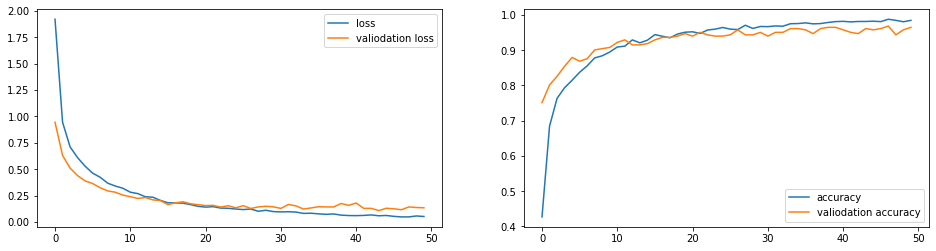

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label='valiodation loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].plot(history.history['val_accuracy'], label='valiodation accuracy')
axs[1].legend()

plt.show()

## Validation

In [14]:
def predict(image: np.ndarray) -> str:
    raw_prediction = model.predict(image)
    prediction = TARGET_DECODED[np.argmax(raw_prediction)]
    return prediction

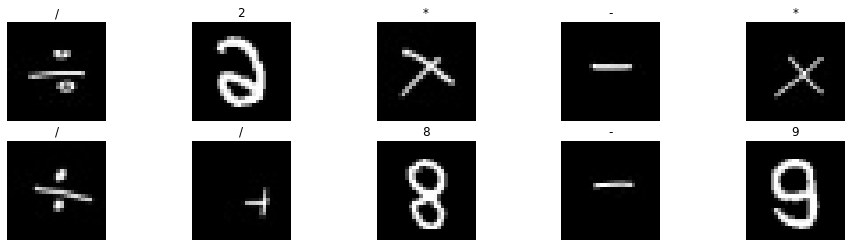

In [55]:
fig, axs = plt.subplots(2, 5, figsize=(16, 4))

for i in range(len(axs)):
    for j in range(len(axs[0])):
        r = random.randint(0, len(x_test))
        img = x_test[r:r+1]

        axs[i][j].imshow(img[0][0], cmap='gray')
        axs[i][j].set_title(predict(img))
        axs[i][j].axis('off')